# Data Engineering  Final Project, Group 5
### Regression Code

#### Importing our Dataset

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

df = pd.read_csv("Japan-predict.csv")
df['Date'] = pd.to_datetime(df['Date'])

# Record number is our index
df.index.name = "record"
print(df.head())
df.tail()

             Date  Covid Cases  Deaths  Unemployment  Laborforce- male  \
record                                                                   
0      2019-11-22            0       0        1545.0           38440.0   
1      2019-11-23            0       0        1541.0           38439.0   
2      2019-11-24            0       0        1536.0           38437.0   
3      2019-11-25            0       0        1532.0           38436.0   
4      2019-11-26            0       0        1528.0           38435.0   

        Laborforce- female  
record                      
0                  30791.0  
1                  30780.0  
2                  30768.0  
3                  30757.0  
4                  30746.0  


,Date,Covid Cases,Deaths,Unemployment,Laborforce- male,Laborforce- female
record,,,,,,
1058,2022-10-15,0,0,NaN,NaN,NaN
1059,2022-10-16,0,0,NaN,NaN,NaN
1060,2022-10-17,0,0,NaN,NaN,NaN
1061,2022-10-18,0,0,NaN,NaN,NaN
1062,2022-10-19,0,0,NaN,NaN,NaN


#### Creating our test & training dataset
Since our original dataset contains a lot of unpredicted values,i.e., future unemployment & laborforce,
the dataset must first be seperated into two different datasets, one tha contains all of our known values,
& one that contains all of our unkown values.

In [62]:
from sklearn.model_selection import train_test_split

# ColY consists of all our dependants.
# ColX consists of our predictors
colY = ['Unemployment', 'Laborforce- male', 'Laborforce- female']
colX = ['Covid Cases','Deaths']

# notnans contains all of our known values, hence we can create a model with this dataset.
known = df[colY].notnull().all(axis=1)
df_known = df[known]

X_train, X_test, y_train, y_test = train_test_split(df_known[colX], df_known[colY],
                                                    train_size=0.75,
                                                    random_state=4)

#### Random Forest Model
For our first model, we've used a Random Forest Regression model.<br>
The model also uses Multi output regression since we're trying to predict more than 3 variables.
We have used Random Forest because:
   * Higher accuracy
   * Better at handling missing values while maintaining accuracy
   * Low bias due to Bagging & Ensembling
    

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

# The model
model = MultiOutputRegressor(RandomForestRegressor(random_state=0))

# Fit the training data
model.fit(X_train, y_train)

# Check the prediction score
score = model.score(X_test, y_test)
print("Accuracy of test data is {:.2f}".format(score))

Accuracy of test data is 0.87


D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#### Linear Regression Model
We also created another model based on linear regression

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model_2 = MultiOutputRegressor(LinearRegression())

# Fit on the train data
model_2.fit(X_train, y_train)

# Creating our predictions
y_pred = model_2.predict(X_test)

r2 = r2_score(y_test, y_pred)
print('r2 score is = ' + str(r2))

r2 score is = 0.22265850666962875


#### Forecasting with our model
We've used our random forest model for forecasting since it has a better rate of accuracy in comparison to our linear model. <br>
Before we create our predictions, we first create a dataset that consist of all of our unkown variables

In [65]:
df_unk = df.loc[~known].copy()
df_unk[colY] = model.predict(df_unk[colX])

df_unk.tail()

,Date,Covid Cases,Deaths,Unemployment,Laborforce- male,Laborforce- female
record,,,,,,
1058,2022-10-15,0,0,1494.524791,38290.479564,30598.929081
1059,2022-10-16,0,0,1494.524791,38290.479564,30598.929081
1060,2022-10-17,0,0,1494.524791,38290.479564,30598.929081
1061,2022-10-18,0,0,1494.524791,38290.479564,30598.929081
1062,2022-10-19,0,0,1494.524791,38290.479564,30598.929081


[Text(0, 0.5, 'Unemployment'), Text(0.5, 0, 'Month & Year')]

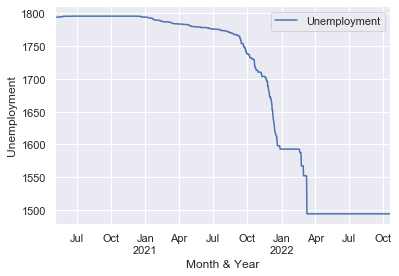

In [66]:
df_unk[['Date','Unemployment']].set_index('Date').plot().set(xlabel ='Month & Year', ylabel ='Unemployment')

[Text(0, 0.5, ' Male Laborforce'), Text(0.5, 0, 'Month & Year')]

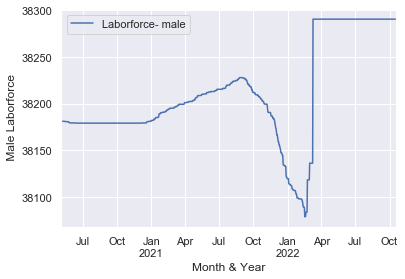

In [67]:
df_unk[['Date','Laborforce- male']].set_index('Date').plot().set(xlabel ='Month & Year', 
                                                                 ylabel =' Male Laborforce')

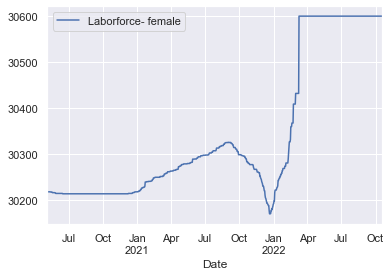

In [68]:
df_unk[['Date','Laborforce- female']].set_index('Date').plot()